In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
conn = sqlite3.connect("C://Users//harsh//Downloads//sales_data.db")

In [23]:
query = "SELECT * FROM sales;"
df = pd.read_sql_query(query, conn)
print(df)

   id   sale_date      product  quantity    price
0   1  2025-08-01       Mobile         3  12000.0
1   2  2025-08-01       Laptop         1  65000.0
2   3  2025-08-02  Accessories         5    799.0
3   4  2025-08-02           TV         2  42000.0
4   5  2025-08-03       Mobile         2  15000.0
5   6  2025-08-03       Laptop         1  72000.0
6   7  2025-08-04  Accessories        10    499.0
7   8  2025-08-04           TV         1  38000.0
8   9  2025-08-05       Mobile         1  18000.0
9  10  2025-08-05  Accessories         3   1299.0


In [33]:
query = """SELECT 
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;"""
df_prod= pd.read_sql_query(query, conn)
print(df)

    sale_date  daily_revenue
0  2025-08-01       101000.0
1  2025-08-02        87995.0
2  2025-08-03       102000.0
3  2025-08-04        42990.0
4  2025-08-05        21897.0


In [35]:
query="""SELECT 
    sale_date,
    ROUND(SUM(quantity * price), 2) AS daily_revenue
FROM sales
GROUP BY sale_date
ORDER BY sale_date;"""
df_sale= pd.read_sql_query(query, conn)
print(df)

    sale_date  daily_revenue
0  2025-08-01       101000.0
1  2025-08-02        87995.0
2  2025-08-03       102000.0
3  2025-08-04        42990.0
4  2025-08-05        21897.0


In [41]:
print(df_prod.columns)
print(df_prod.head())

Index(['product', 'total_qty', 'revenue'], dtype='object')
       product  total_qty   revenue
0       Laptop          2  137000.0
1           TV          3  122000.0
2       Mobile          6   84000.0
3  Accessories         18   12882.0


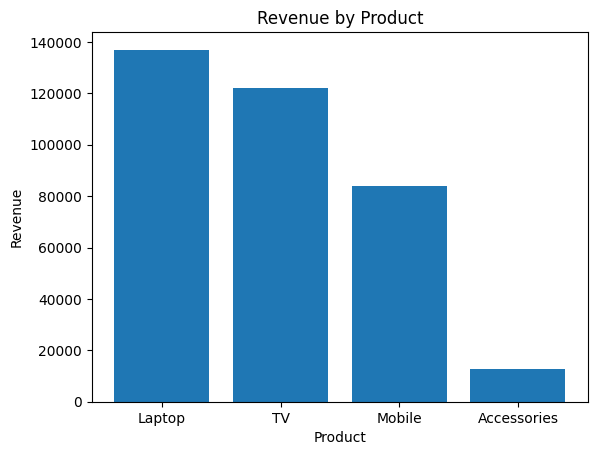

In [54]:
plt.bar(df_prod['product'], df_prod['revenue'])
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.savefig(r"C://Users//harsh//Downloads//sales_chart.png")
plt.show()



In [46]:
plt.savefig("revenue_chart.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>